In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq

## EDA

### Carga de datos

In [25]:
games=pd.read_parquet("games.parquet")

In [3]:
reviews=pd.read_parquet("reviews_nlp.parquet")

In [4]:
items=pd.read_parquet("items.parquet")

### Analisis de Games

In [26]:
games.head()

,genres,item_name,tags,specs,price,early_access,item_id,developer,release_year
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0.0,761140.0,Kotoshiro,2018.0
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,643980.0,Secret Level SRL,2018.0
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,670290.0,Poolians.com,2017.0
88313,"[Action, Adventure, Casual]",弹炸人2222,"[Action, Adventure, Casual]",[Single-player],0.99,0.0,767400.0,彼岸领域,2017.0
88314,None,Log Challenge,"[Action, Indie, Casual, Sports]","[Single-player, Full controller support, HTC V...",2.99,0.0,773570.0,None,NaN


In [27]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32131 entries, 88310 to 120444
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        28849 non-null  object 
 1   item_name     32131 non-null  object 
 2   tags          31969 non-null  object 
 3   specs         31462 non-null  object 
 4   price         30755 non-null  float64
 5   early_access  32131 non-null  float64
 6   item_id       32131 non-null  float64
 7   developer     28834 non-null  object 
 8   release_year  29961 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.5+ MB


In [18]:
#Crea una lista con todos los unicos de las listas de una columna
def frec_unicos(col):
    u = []
    for sublist in col:
        if type(sublist)==np.ndarray or type(sublist)==list:
            for genre in sublist:
                u.append(genre)
    return pd.Series(u).value_counts()

#### Genres

In [8]:
games

,genres,item_name,tags,specs,price,early_access,item_id,developer,release_year
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0.0,761140.0,Kotoshiro,2018.0
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,643980.0,Secret Level SRL,2018.0
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,670290.0,Poolians.com,2017.0
88313,"[Action, Adventure, Casual]",弹炸人2222,"[Action, Adventure, Casual]",[Single-player],0.99,0.0,767400.0,彼岸领域,2017.0
88314,None,Log Challenge,"[Action, Indie, Casual, Sports]","[Single-player, Full controller support, HTC V...",2.99,0.0,773570.0,None,NaN
...,...,...,...,...,...,...,...,...,...
120440,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,"[Strategy, Indie, Casual, Simulation]","[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS""",2018.0
120441,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,"[Strategy, Indie, Casual]","[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada,2018.0
120442,"[Indie, Racing, Simulation]",Russian Roads,"[Indie, Simulation, Racing]","[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich,2018.0
120443,"[Casual, Indie]",EXIT 2 - Directions,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...","[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns",2017.0


In [28]:
lista_genres=frec_unicos(games['genres'])

In [29]:
lista_genres

Indie                        15857
Action                       11318
Casual                        8282
Adventure                     8242
Strategy                      6957
Simulation                    6699
RPG                           5479
Free to Play                  2031
Early Access                  1462
Sports                        1257
Massively Multiplayer         1108
Racing                        1083
Design &amp; Illustration      460
Utilities                      340
Web Publishing                 268
Animation &amp; Modeling       183
Education                      125
Video Production               116
Software Training              105
Audio Production                93
Photo Editing                   77
Accounting                       7
Name: count, dtype: int64

In [11]:
lista_genres.size

22

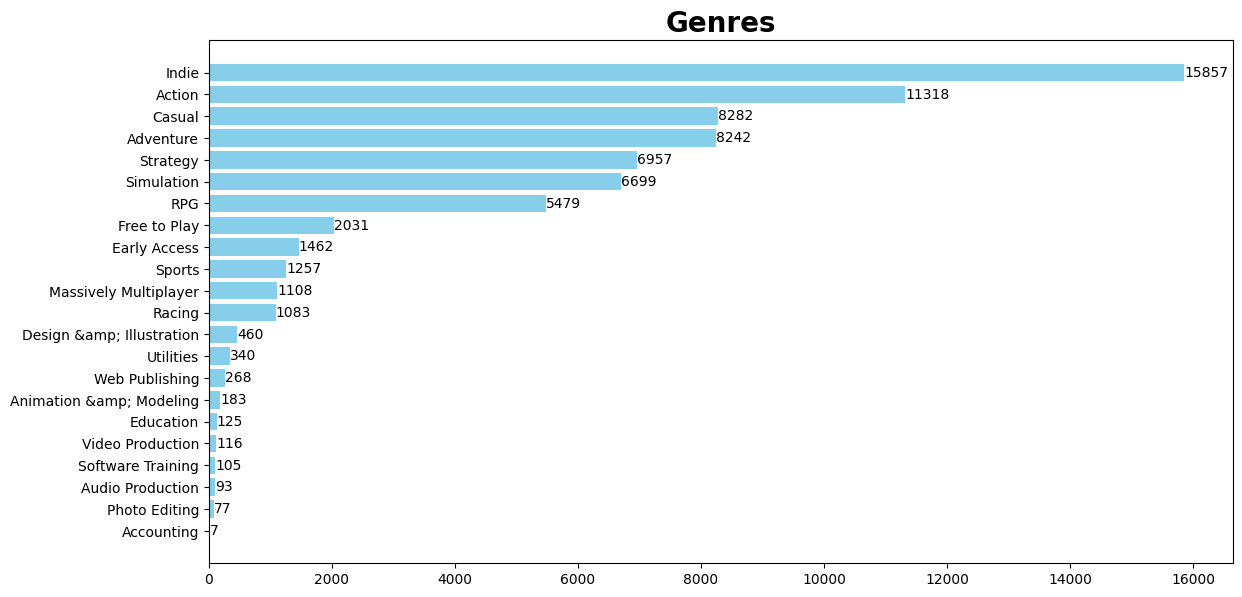

In [12]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(lista_genres.index,lista_genres.values,color='skyblue')
plt.gca().invert_yaxis()
plt.title('Genres', fontweight = 'bold',fontsize=20)
for index, value in enumerate(lista_genres.values):
    plt.text(value, index, str(value), va='center')
plt.show()

#### Item_name

In [13]:
np.size(games['item_name'].unique())

32094

In [14]:
games['item_name'].value_counts().head(15)

item_name
Soundtrack                  3
Escape Room                 2
Taxi                        2
WARZONE                     2
Total Extreme Wrestling     2
Colony                      2
Dark Matter                 2
Invasion                    2
Alter Ego                   2
Castles                     2
Archangel                   2
Hero                        2
New York Bus Simulator      2
Invisible Apartment Zero    2
Invisible Apartment 2       2
Name: count, dtype: int64

In [15]:
games[games.duplicated(subset=['item_name'])].size

333

#### Tags

In [16]:
lista_tags=frec_unicos(games['tags'])

In [17]:
pd.set_option('display.max_rows', None)
lista_tags

Indie                                17619
Action                               13002
Adventure                             9829
Casual                                9739
Simulation                            7730
Strategy                              7566
RPG                                   5919
Singleplayer                          4344
Free to Play                          2406
Multiplayer                           2383
Great Soundtrack                      2234
Puzzle                                2111
Early Access                          1947
2D                                    1945
Atmospheric                           1933
VR                                    1796
Sports                                1597
Platformer                            1449
Story Rich                            1444
Sci-fi                                1387
Fantasy                               1363
Horror                                1332
Open World                            1317
Difficult  

In [18]:
pd.reset_option('display.max_rows')

In [19]:
lista_tags.size

339

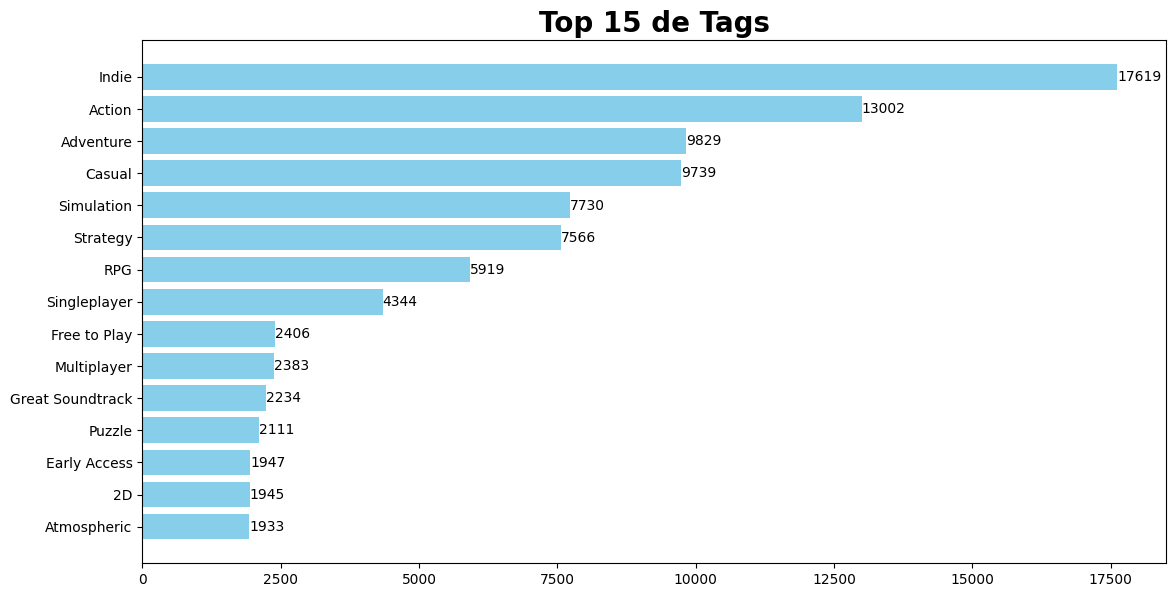

In [20]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(lista_tags.head(15).index,lista_tags.head(15).values,color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 15 de Tags', fontweight = 'bold',fontsize=20)
for index, value in enumerate(lista_tags.head(15).values):
    plt.text(value, index, str(value), va='center')
plt.show()

#### Specs

In [21]:
lista_specs=frec_unicos(games['specs'])

In [22]:
lista_specs

Single-player                 27574
Steam Achievements            16364
Downloadable Content          12691
Steam Trading Cards           12198
Steam Cloud                    9958
Multi-player                   8198
Full controller support        7384
Partial Controller Support     6538
Steam Leaderboards             6081
Co-op                          4280
Shared/Split Screen            3962
Cross-Platform Multiplayer     2550
Online Multi-Player            2370
Stats                          2321
HTC Vive                       1984
Steam Workshop                 1866
Tracked Motion Controllers     1816
Captions available             1643
Standing                       1462
Room-Scale                     1445
Includes level editor          1377
Local Multi-Player             1237
Oculus Rift                    1213
Seated                         1090
Online Co-op                    998
MMO                             942
In-App Purchases                933
Local Co-op                 

In [23]:
lista_specs.size

40

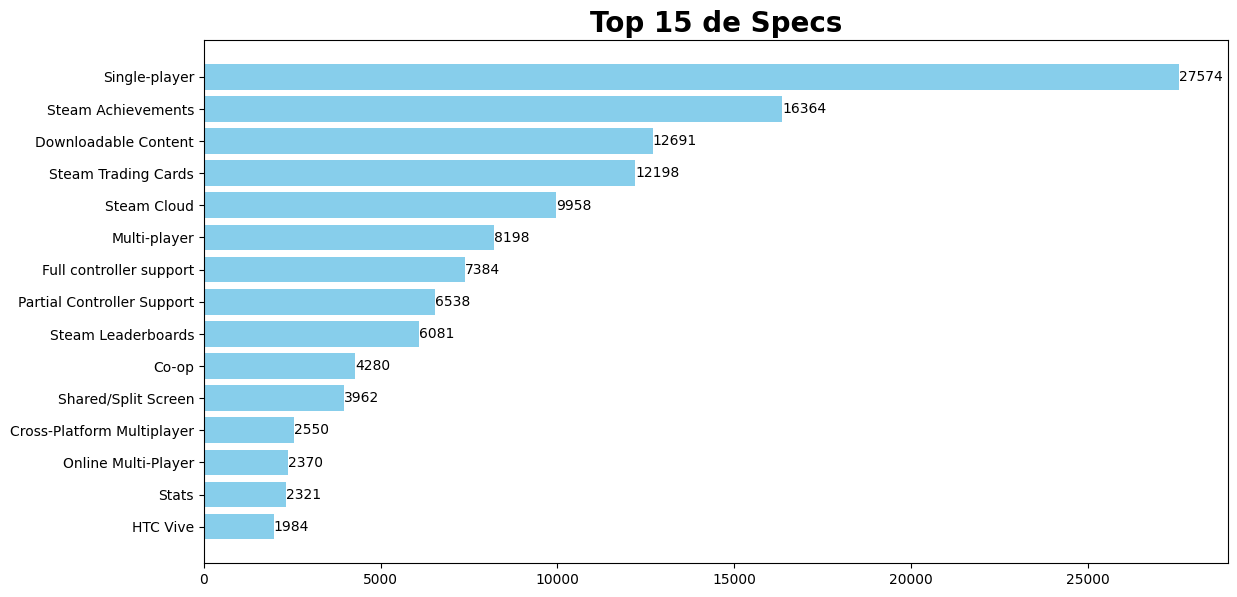

In [24]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(lista_specs.head(15).index,lista_specs.head(15).values,color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 15 de Specs', fontweight = 'bold',fontsize=20)
for index, value in enumerate(lista_specs.head(15).values):
    plt.text(value, index, str(value), va='center')
plt.show()

#### Price

In [25]:
games['price'].describe()

count    30755.000000
mean         8.895293
std         16.338786
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

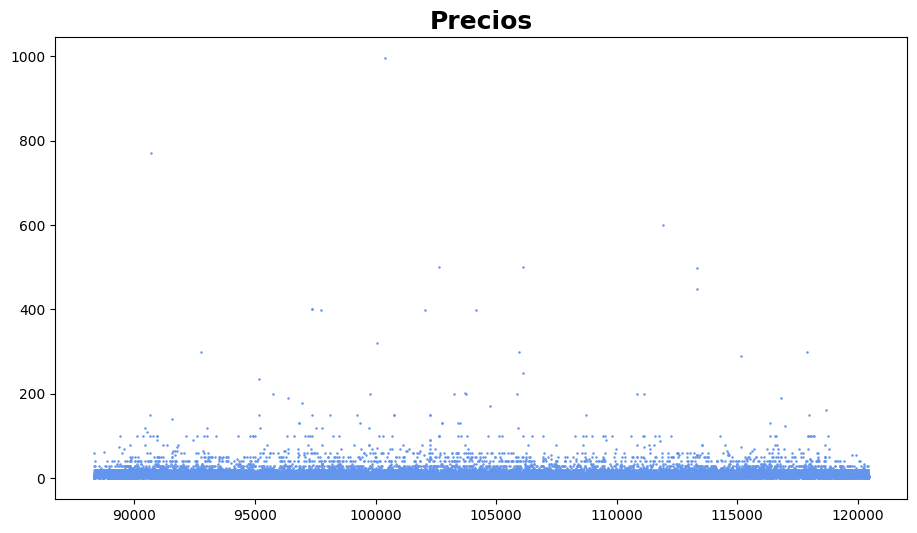

In [26]:
plt.figure(figsize=(11,6))
plt.plot(games['price'],'o',markersize=0.8,color='cornflowerblue')
plt.title('Precios', fontweight = 'bold',fontsize=18)
plt.show()

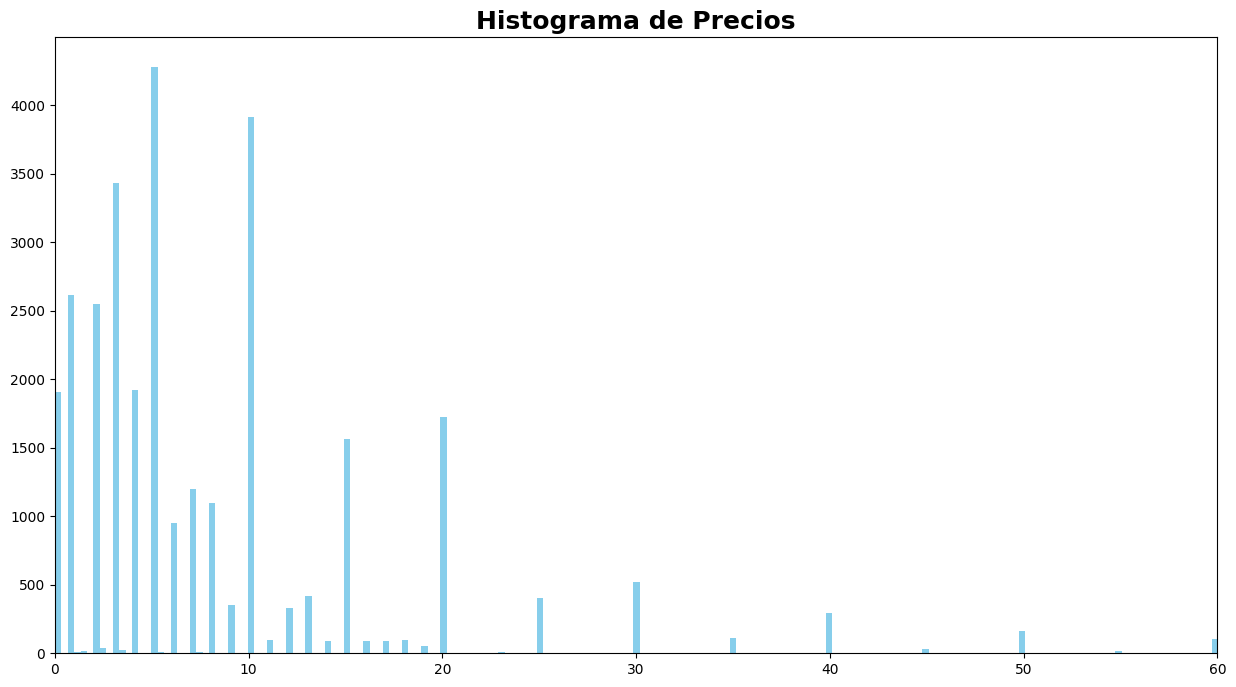

In [27]:
plt.figure(figsize=(15,8))
plt.hist(games['price'],bins=3000,color='skyblue')
plt.title('Histograma de Precios', fontweight = 'bold',fontsize=18)
plt.xlim(0,60)
plt.show()

##### Analisis de BoxPlot

In [28]:
#Calculo de bigotes
Q3 = float(games['price'].quantile(0.75))
Q1 = float(games['price'].quantile(0.25))
RIC = Q3 - Q1

min_price = Q1 - 1.5*RIC
if min_price < min(games['price']):
    min_price = min(games['price'])
max_price = Q3 + 1.5*RIC
if max_price > max(games['price']):
    max_price = max(games['price'])

min_price, max_price

(0.0, 20.490000000000002)

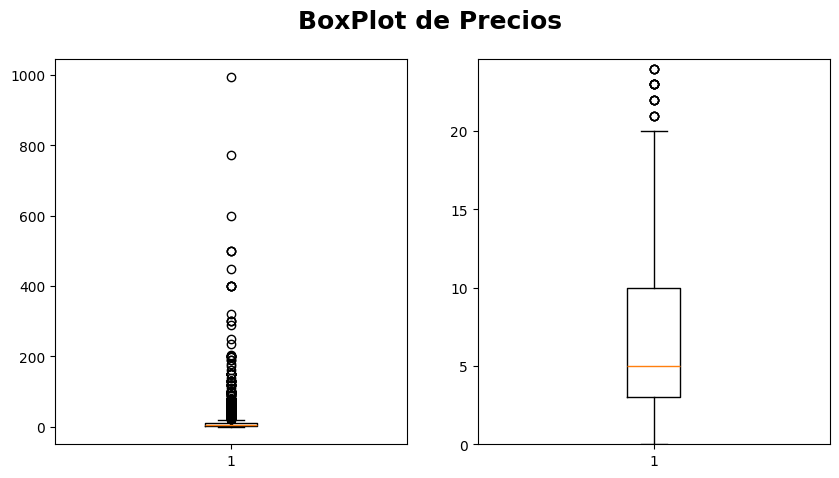

In [29]:
fig, ax = plt.subplots(1, 2,figsize = (10,5))
fig.suptitle('BoxPlot de Precios',fontsize=18, fontweight='bold')

ax[0].boxplot(games['price'].dropna())

ax[1].boxplot(games['price'].dropna())
ax[1].set_ylim(min_price*0.8, max_price*1.2)

plt.show()

In [30]:
print('Cantidad de outliers:', games[games['price']>=max_price].shape[0])
print('Porcentaje de outliers:',(games[games['price']>=max_price].shape[0]/games.shape[0])*100,'%')

Cantidad de outliers: 1884
Porcentaje de outliers: 5.863496311972861 %


In [31]:
games[games['price']>=max_price]

,genres,item_name,tags,specs,price,early_access,item_id,developer,release_year
88318,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Legend Pass,"[Free to Play, Indie, Simulation, Sports]","[Single-player, Multi-player, Online Multi-Pla...",29.99,0.0,774278.0,Poppermost Productions,2018.0
88328,"[Free to Play, Indie, Simulation, Sports]",SNOW - Lifetime Pack,"[Free to Play, Indie, Simulation, Sports]","[Single-player, Multi-player, Online Multi-Pla...",59.99,0.0,774279.0,Poppermost Productions,2018.0
88361,None,Medicalholodeck Personal Version,[Education],"[Tracked Motion Controllers, Seated, Standing]",29.99,0.0,769350.0,None,NaN
88369,[Racing],RACE - The WTCC Game,"[Racing, Simulation]","[Single-player, Multi-player]",39.99,0.0,4230.0,SimBin,2006.0
88544,"[Massively Multiplayer, RPG]",Guild Wars Trilogy,"[RPG, Massively Multiplayer, MMORPG, PvP]","[Multi-player, MMO]",29.99,0.0,29570.0,ArenaNet®,2008.0
...,...,...,...,...,...,...,...,...,...
120248,"[RPG, Simulation]",愛神餐館2,"[RPG, Simulation, Anime]",[Single-player],34.99,0.0,769680.0,Firedog Creative Company Limited,2017.0
120266,None,Three Kingdoms VR - Jade Knight (光之三國VR - 青龍騎),"[Action, Casual, Simulation, Sports]","[Single-player, Steam Achievements, Steam Clou...",24.99,0.0,731120.0,None,NaN
120269,"[Massively Multiplayer, Racing, Simulation, Sp...",CarX Drift Racing Online - Deluxe,"[Massively Multiplayer, Simulation, Racing, Sp...","[Single-player, Multi-player, Online Multi-Pla...",29.99,0.0,776950.0,CarX Technologies,2017.0
120380,"[Action, Adventure, Casual, Indie, Simulation,...",Mesozoica,"[Early Access, Simulation, Strategy, Casual, I...",[Single-player],29.99,1.0,719590.0,"DreamInCode B.V.,Squadron Interactive",2018.0


In [32]:
pd.set_option('display.max_rows', None)
print(games['price'].value_counts().sort_index(ascending=True))
pd.reset_option('display.max_rows')

price
0.00      1908
0.49         2
0.50         1
0.89         1
0.95         1
0.98         2
0.99      2607
1.00         4
1.25         3
1.29         2
1.39         1
1.49         9
1.50         1
1.59         3
1.87         1
1.95         1
1.99      2541
2.00         3
2.30         1
2.49        38
2.66         1
2.89         1
2.97         1
2.99      3429
3.00         1
3.33         2
3.39         1
3.49        19
3.99      1918
4.00         1
4.29         1
4.49         4
4.68         1
4.99      4278
5.00         2
5.49         7
5.65         1
5.99       948
6.00         1
6.48         1
6.49         1
6.66         1
6.99      1199
7.00         1
7.49        11
7.99      1095
8.98         1
8.99       347
9.00         1
9.69         1
9.95         1
9.98         1
9.99      3902
10.00        5
10.49        1
10.93        1
10.96        1
10.99       93
11.15        1
11.99      331
12.00        1
12.89        1
12.99      417
13.37        1
13.98        1
13.99       92
14.9

#### Early_access

In [33]:
games['early_access'].value_counts()

early_access
0.0    30184
1.0     1947
Name: count, dtype: int64

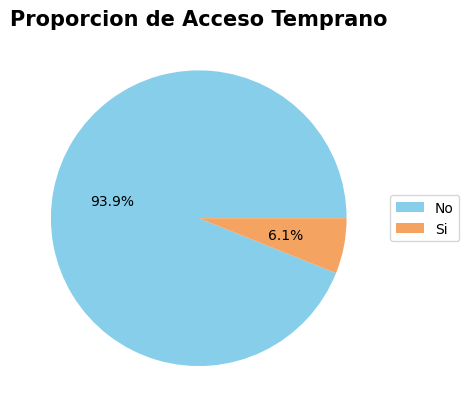

In [34]:
plt.pie(games['early_access'].value_counts(),autopct='%1.1f%%',colors=['skyblue','sandybrown'])
plt.title('Proporcion de Acceso Temprano',fontsize=15,fontweight='bold')
plt.legend(['No','Si'],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

#### Developer

In [35]:
np.size(games['developer'].unique())

10993

In [36]:
games['developer'].value_counts()

developer
Ubisoft - San Francisco       1259
SmiteWorks USA, LLC            813
Dovetail Games                 253
KOEI TECMO GAMES CO., LTD.     232
Paradox Development Studio     156
                              ... 
Tony Wang                        1
Trokardia                        1
Sai Attack                       1
Cyber Prophet                    1
Wrecked Angle Studios            1
Name: count, Length: 10992, dtype: int64

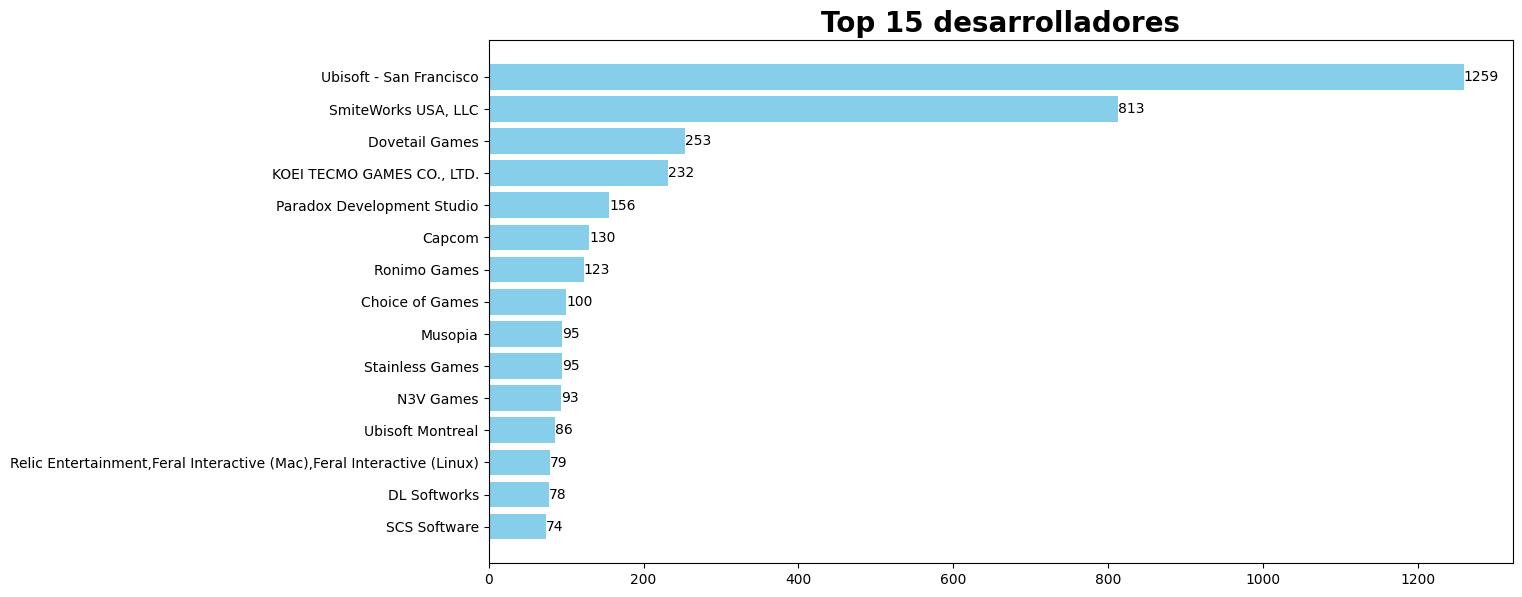

In [37]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(games['developer'].dropna().value_counts().head(15).index,games['developer'].dropna().value_counts().head(15).values,color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 15 desarrolladores', fontweight = 'bold',fontsize=20)
for index, value in enumerate(games['developer'].dropna().value_counts().head(15).values):
    plt.text(value, index, str(value), va='center')
plt.show()

#### Release_year

In [38]:
games['release_year'].unique().size

44

In [39]:
games['release_year'].value_counts().sort_index(ascending=True)

release_year
1970.0       2
1975.0       1
1980.0       1
1981.0       3
1982.0       3
1983.0       4
1984.0       4
1985.0       3
1986.0       1
1987.0       9
1988.0       7
1989.0      10
1990.0      12
1991.0      16
1992.0      15
1993.0      34
1994.0      36
1995.0      33
1996.0      39
1997.0      42
1998.0      61
1999.0      55
2000.0      40
2001.0      69
2002.0      50
2003.0      84
2004.0      79
2005.0     102
2006.0     155
2007.0     167
2008.0     213
2009.0     341
2010.0     442
2011.0     590
2012.0    1192
2013.0    1552
2014.0    2843
2015.0    4952
2016.0    6943
2017.0    9594
2018.0     157
2019.0       4
2021.0       1
Name: count, dtype: int64

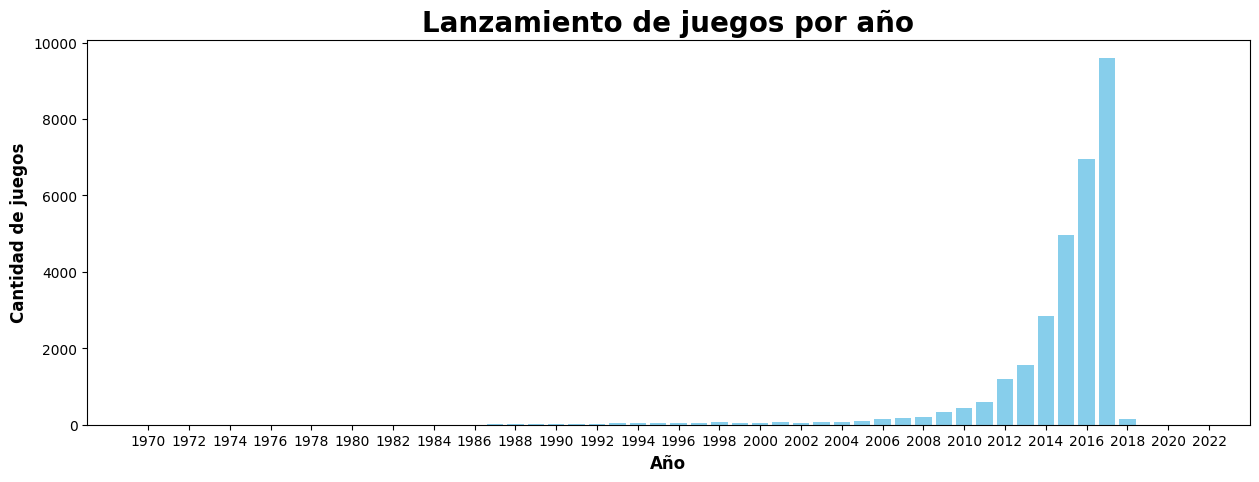

In [40]:
plt.figure(figsize=(15,5))
plt.bar(games['release_year'].value_counts().index,games['release_year'].value_counts().values,color='skyblue')
plt.title('Lanzamiento de juegos por año',fontweight = 'bold',fontsize=20)
plt.xlabel('Año',fontweight = 'bold',fontsize=12)
plt.ylabel('Cantidad de juegos',fontweight = 'bold',fontsize=12)
plt.xticks(ticks=list(range(1970,2023,2)))
plt.show()

### Analisis de Reviews

In [4]:
reviews.head()

,user_id,item_id,recommend,item_name,sentiment_analysis,words,word_count
0,76561197970982479,1250.0,True,Killing Floor,1,"[simple, yet, great, replayability, opinion, z...",44
1,76561197970982479,22200.0,True,Zeno Clash,1,"[unique, worth, playthrough]",7
2,76561197970982479,43110.0,True,Metro 2033,2,"[great, atmosphere, gunplay, bit, chunky, time...",40
3,js41637,251610.0,True,Barbie™ Dreamhouse Party™,1,"[know, think, see, title, barbie, dreamhouse, ...",112
4,js41637,227300.0,True,Euro Truck Simulator 2,1,"[simple, actually, not, simple, truck, driving...",117


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58197 entries, 0 to 58430
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             58197 non-null  object 
 1   item_id             58197 non-null  float64
 2   recommend           58197 non-null  bool   
 3   item_name           58197 non-null  object 
 4   sentiment_analysis  58197 non-null  int64  
 5   words               58197 non-null  object 
 6   word_count          58197 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 3.2+ MB


#### Recommend

In [6]:
reviews['recommend'].value_counts()

recommend
True     51502
False     6695
Name: count, dtype: int64

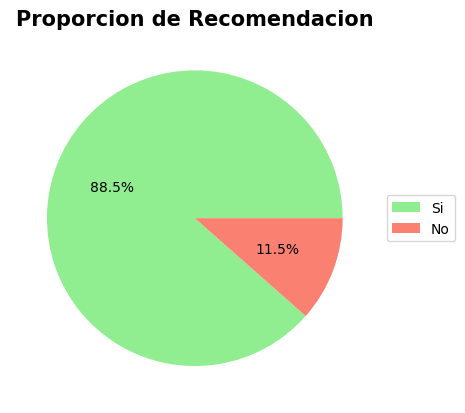

In [7]:
plt.pie(reviews['recommend'].value_counts(),autopct='%1.1f%%',colors=['lightgreen','salmon'])
plt.title('Proporcion de Recomendacion',fontsize=15,fontweight='bold')
plt.legend(['Si','No'],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

#### Sentiment_analysis

In [8]:
reviews['sentiment_analysis'].value_counts()

sentiment_analysis
1    45728
2    10089
0     2380
Name: count, dtype: int64

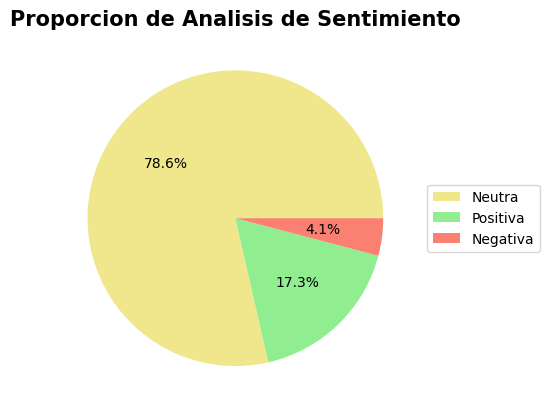

In [9]:
plt.pie(reviews['sentiment_analysis'].value_counts(),autopct='%1.1f%%',colors=['khaki','lightgreen','salmon'])
plt.title('Proporcion de Analisis de Sentimiento',fontsize=15,fontweight='bold')
plt.legend(['Neutra','Positiva','Negativa'],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

#### User_id

In [10]:
reviews['user_id'].value_counts()

user_id
76561198141079508     10
SKELETRONPRIMEISOP    10
imacatseeulr          10
myles101              10
diego9031             10
                      ..
76561198251004808      1
GoAwayZach             1
Leaf_Light_Moscow      1
943525                 1
76561198277602337      1
Name: count, Length: 25412, dtype: int64

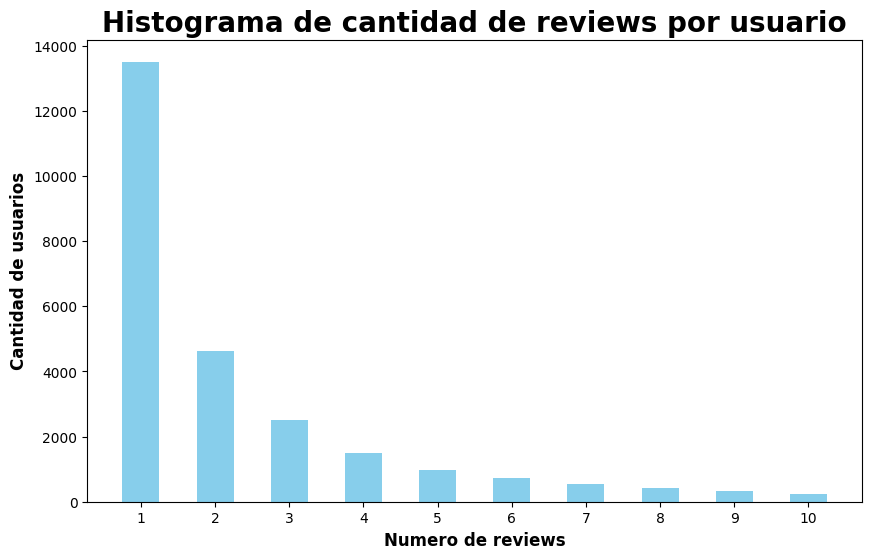

In [11]:
values_counts = reviews['user_id'].value_counts().value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(values_counts.index, values_counts.values, width=0.5, align='center',color='skyblue')
plt.title("Histograma de cantidad de reviews por usuario", fontweight='bold', fontsize=20)
plt.xlabel("Numero de reviews", fontweight='bold', fontsize=12)
plt.ylabel("Cantidad de usuarios", fontweight='bold', fontsize=12)
plt.xticks(ticks=values_counts.index)
plt.show()


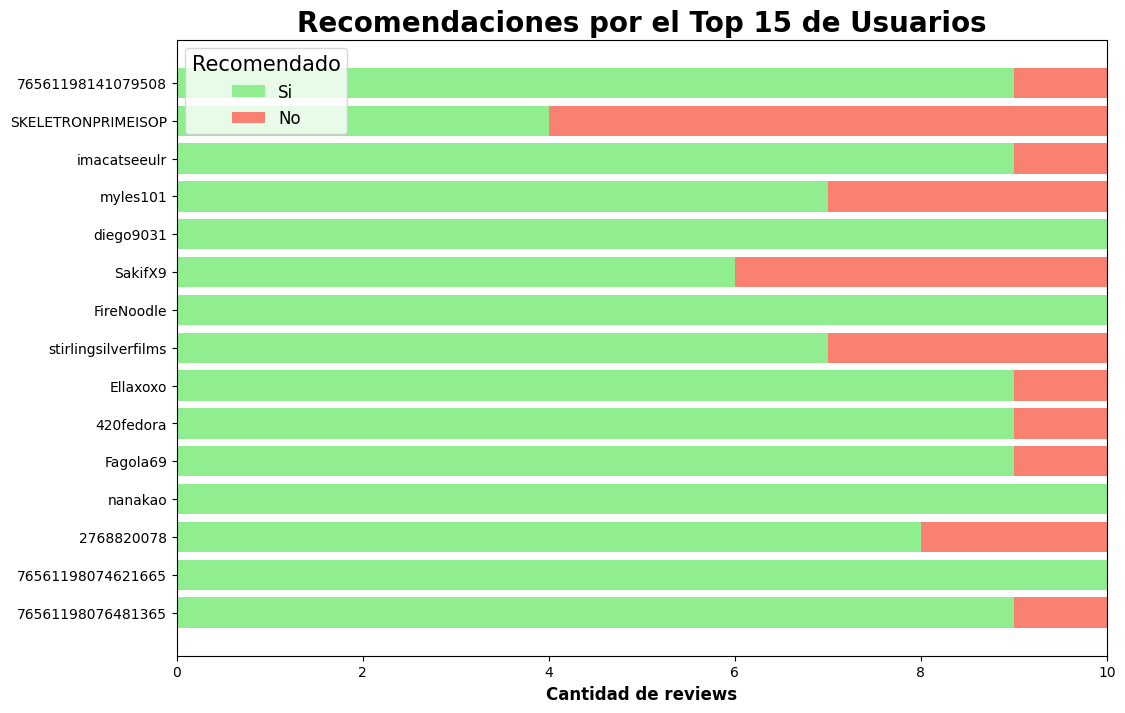

In [12]:
juegos = reviews['user_id'].dropna().value_counts().head(15).index
pos = reviews[reviews['recommend'] == True]['user_id'].value_counts().reindex(juegos, fill_value=0).values
neg = reviews[reviews['recommend'] == False]['user_id'].value_counts().reindex(juegos, fill_value=0).values

plt.figure(figsize=(12, 8))
plt.barh(juegos, pos, label='Si',color='lightgreen')
plt.barh(juegos, neg, left=pos, label='No', color='salmon')
plt.xlabel("Cantidad de reviews",fontweight='bold',fontsize=12)
plt.title("Recomendaciones por el Top 15 de Usuarios", fontweight='bold', fontsize=20)
plt.gca().invert_yaxis()
plt.legend(title='Recomendado',title_fontsize=15,fontsize=12)
plt.show()

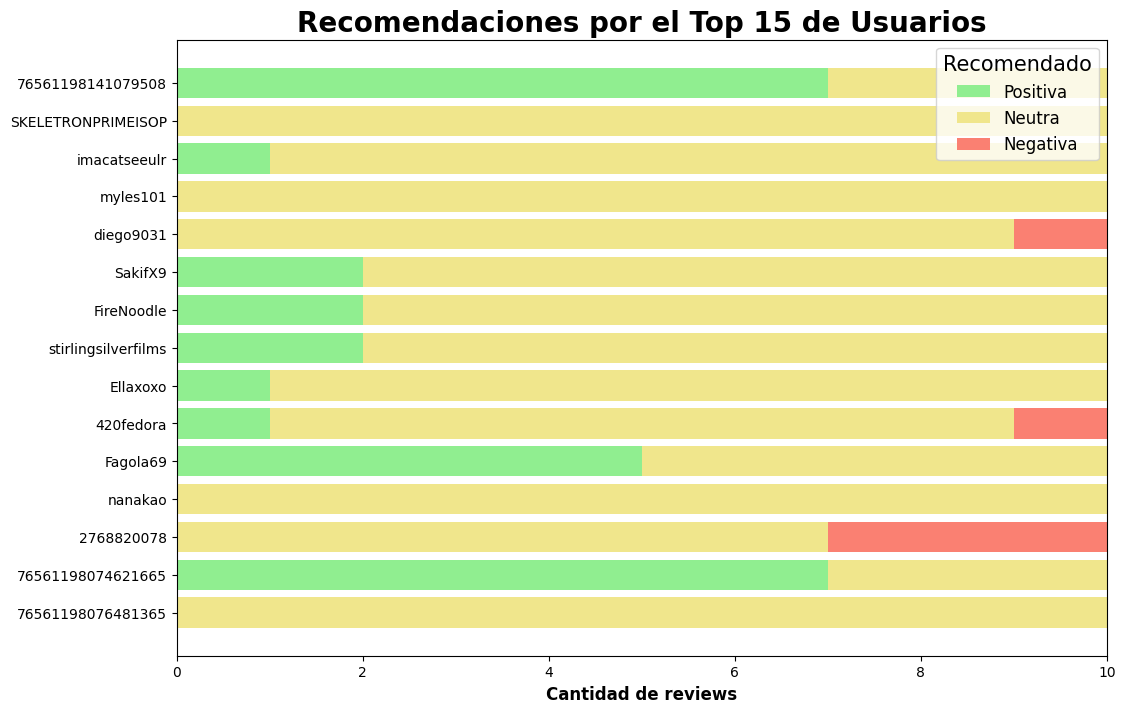

In [13]:
juegos = reviews['user_id'].dropna().value_counts().head(15).index
pos = reviews[reviews['sentiment_analysis'] == 2]['user_id'].value_counts().reindex(juegos, fill_value=0).values
neu = reviews[reviews['sentiment_analysis'] == 1]['user_id'].value_counts().reindex(juegos, fill_value=0).values
neg = reviews[reviews['sentiment_analysis'] == 0]['user_id'].value_counts().reindex(juegos, fill_value=0).values

plt.figure(figsize=(12, 8))
plt.barh(juegos, pos, label='Positiva',color='lightgreen')
plt.barh(juegos, neu, left=pos, label='Neutra', color='khaki')
plt.barh(juegos, neg, left=pos+neu, label='Negativa', color='salmon')
plt.xlabel("Cantidad de reviews",fontweight='bold',fontsize=12)
plt.title("Recomendaciones por el Top 15 de Usuarios", fontweight='bold', fontsize=20)
plt.gca().invert_yaxis()
plt.legend(title='Recomendado',title_fontsize=15,fontsize=12)
plt.show()

#### Item_id y Item_name

Se tienen 204 registros con 'item_id', pero no 'item_name'. Por lo tanto, se decidio realizar el analisis solamente sobre la columna 'item_name'

In [14]:
reviews['item_id'].value_counts()

item_id
730.0       3704
440.0       3691
4000.0      1704
570.0       1541
218620.0    1112
            ... 
385630.0       1
348670.0       1
203250.0       1
385890.0       1
431840.0       1
Name: count, Length: 3588, dtype: int64

In [15]:
reviews['item_name'].value_counts()

item_name
Counter-Strike: Global Offensive    3704
Team Fortress 2                     3691
Garry's Mod                         1704
Dota 2                              1541
PAYDAY 2                            1112
                                    ... 
Golden Rush                            1
3DRPG                                  1
Hocus Pocus                            1
Word Rescue                            1
TIS-100                                1
Name: count, Length: 3586, dtype: int64

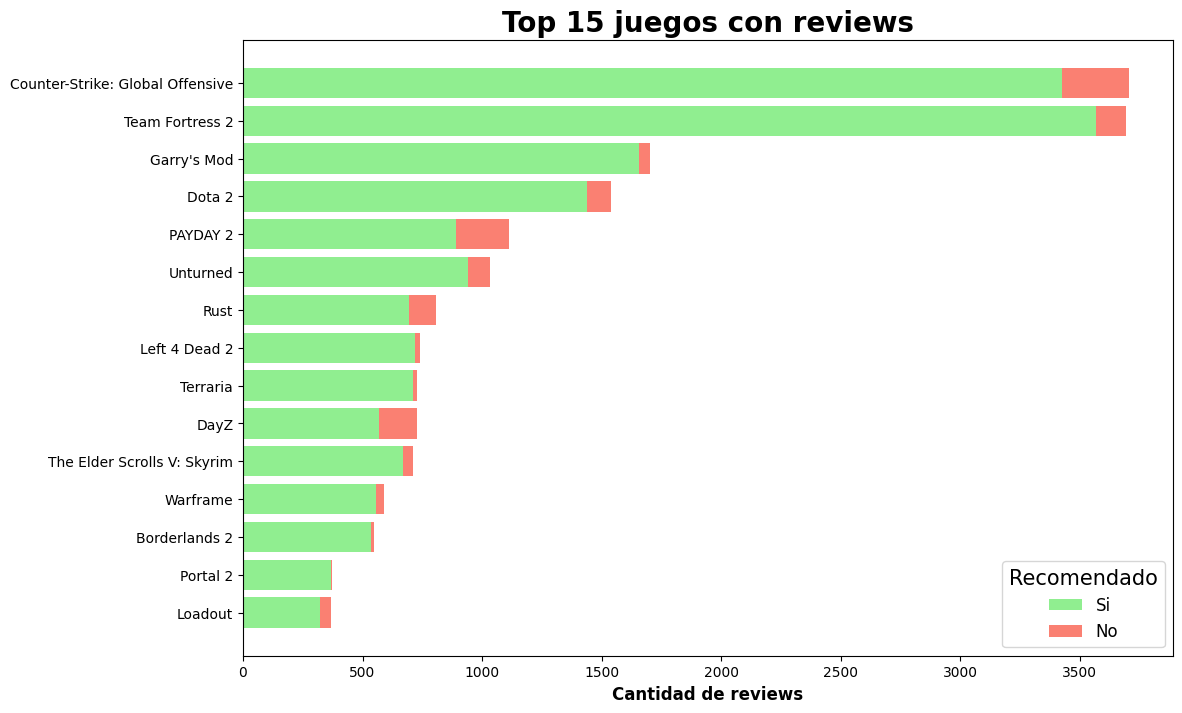

In [16]:
juegos = reviews['item_name'].dropna().value_counts().head(15).index
pos = reviews[reviews['recommend'] == True]['item_name'].value_counts().reindex(juegos, fill_value=0).values
neg = reviews[reviews['recommend'] == False]['item_name'].value_counts().reindex(juegos, fill_value=0).values

plt.figure(figsize=(12, 8))
plt.barh(juegos, pos, label='Si',color='lightgreen')
plt.barh(juegos, neg, left=pos, label='No', color='salmon')
plt.xlabel("Cantidad de reviews",fontweight='bold',fontsize=12)
plt.title("Top 15 juegos con reviews", fontweight='bold', fontsize=20)
plt.gca().invert_yaxis()
plt.legend(title='Recomendado',title_fontsize=15,fontsize=12)
plt.show()

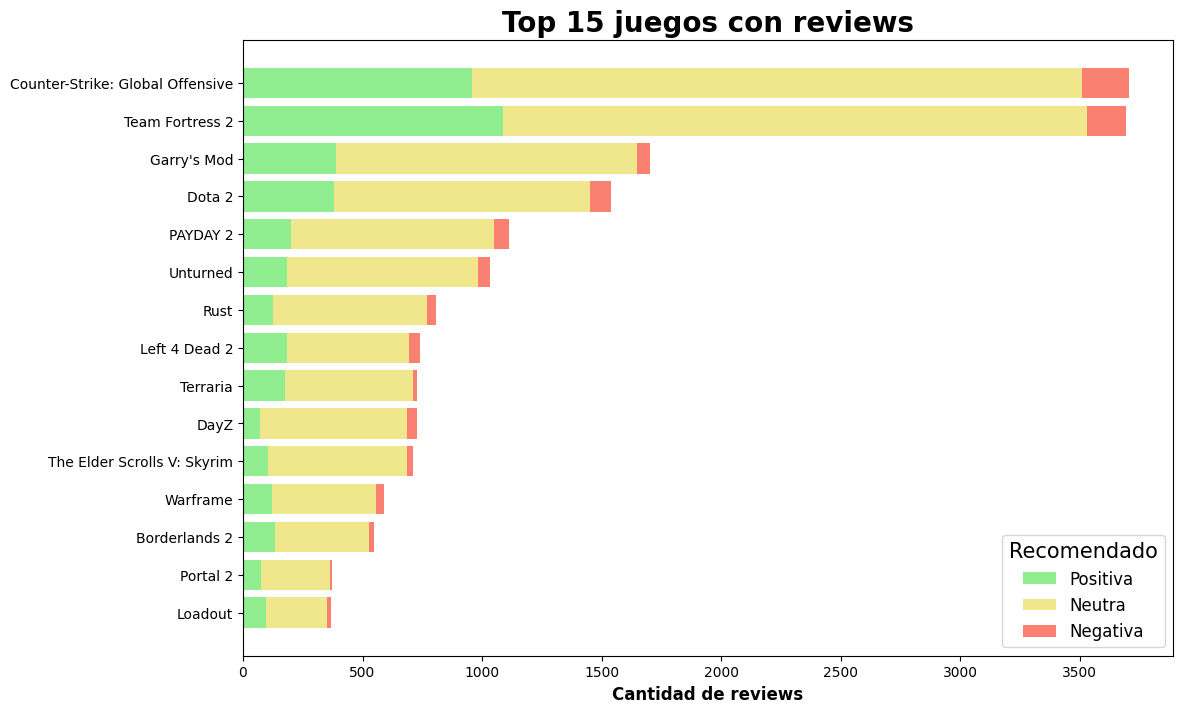

In [17]:
juegos = reviews['item_name'].dropna().value_counts().head(15).index
pos = reviews[reviews['sentiment_analysis'] == 2]['item_name'].value_counts().reindex(juegos, fill_value=0).values
neu = reviews[reviews['sentiment_analysis'] == 1]['item_name'].value_counts().reindex(juegos, fill_value=0).values
neg = reviews[reviews['sentiment_analysis'] == 0]['item_name'].value_counts().reindex(juegos, fill_value=0).values

plt.figure(figsize=(12, 8))
plt.barh(juegos, pos, label='Positiva',color='lightgreen')
plt.barh(juegos, neu, left=pos, label='Neutra', color='khaki')
plt.barh(juegos, neg, left=pos+neu, label='Negativa', color='salmon')
plt.xlabel("Cantidad de reviews",fontweight='bold',fontsize=12)
plt.title("Top 15 juegos con reviews", fontweight='bold', fontsize=20)
plt.gca().invert_yaxis()
plt.legend(title='Recomendado',title_fontsize=15,fontsize=12)
plt.show()

#### Words

In [19]:
palabras = frec_unicos(reviews['words'])

In [20]:
palabras.head(15)

game      60146
not       10738
like      10585
good      10521
play      10327
fun       10231
get        9528
great      8948
one        7440
would      6893
really     6646
games      6248
best       5822
time       5506
even       4461
Name: count, dtype: int64

In [21]:
len(palabras)

67578

In [ ]:
reviews

In [3]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(reviews['words'].value_counts().head(15).index,reviews['words'].value_counts().head(15).values,color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 15 palabras en las Reviews', fontweight = 'bold',fontsize=20)
for index, value in enumerate(reviews['words'].value_counts().head(15).values):
    plt.text(value, index, str(value), va='center')
plt.show()

NameError: name 'reviews' is not defined

<Figure size 640x480 with 0 Axes>

#### Word_count

In [32]:
reviews['word_count'].describe()

count    58197.000000
mean        39.048405
std         82.121741
min          0.000000
25%          5.000000
50%         14.000000
75%         38.000000
max       2000.000000
Name: word_count, dtype: float64

### Analisis de Items

In [13]:
items.head()

NameError: name 'items' is not defined

In [51]:
items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5094092 entries, 0 to 5170013
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user_id    object 
 1   item_id    float64
 2   item_name  object 
 3   playtime   float64
dtypes: float64(2), object(2)
memory usage: 194.3+ MB


#### Duplicados user_id + item_name

Se observo que existian registros con el mismo __user_id__ e __item_name__, lo cual indicaba un usuario que habia adquirido el mismo producto dos veces. Sin embargo, estos registros tenian diferente __item_id__. Se decidio hacer una referenciacion cruzada con el DataFrame __*Games*__ y se encontro que el item_name estaba relacionado solo con uno de los __item_id__. Por lo tanto, se dedcidio eliminar los datos duplicados cuyo __item_id__ no existiera en __*Games*__.

In [52]:
#Variable que contiene los regisgtros duplicados de items segun user_id y item_name de la tabla Items
dup=items[items.duplicated(subset=['user_id','item_name'])]
dup

,user_id,item_id,item_name,playtime
13,76561197970982479,34440.0,Sid Meier's Civilization IV,0.0
361,js41637,34440.0,Sid Meier's Civilization IV,0.0
496,js41637,34450.0,Sid Meier's Civilization IV: Warlords,0.0
497,js41637,34460.0,Sid Meier's Civilization IV: Beyond the Sword,0.0
1333,Riot-Punch,12230.0,Grand Theft Auto III,0.0
...,...,...,...,...
5166906,ChrisCoroner,12250.0,Grand Theft Auto: San Andreas,0.0
5167041,elasticgoose,12230.0,Grand Theft Auto III,0.0
5167042,elasticgoose,12240.0,Grand Theft Auto: Vice City,0.0
5167043,elasticgoose,12250.0,Grand Theft Auto: San Andreas,0.0


In [53]:
#Variable que contiene los registros duplicados de la tabla Items que tienen item_id en Games
ambas = dup.merge(games,on='item_id',how='inner',suffixes=('_items','_games'))
ambas

,user_id,item_id,item_name_items,playtime,genres,item_name_games,tags,specs,price,early_access,developer,release_year
0,76561198076248461,33900.0,Arma 2,11.033333,"[Action, Simulation, Strategy]",Arma 2,"[Simulation, Military, Action, Multiplayer, Ta...","[Single-player, Multi-player, Co-op, Captions ...",12.99,0.0,Bohemia Interactive,2009.0
1,76561198085956238,33900.0,Arma 2,42.800000,"[Action, Simulation, Strategy]",Arma 2,"[Simulation, Military, Action, Multiplayer, Ta...","[Single-player, Multi-player, Co-op, Captions ...",12.99,0.0,Bohemia Interactive,2009.0
2,Bluegills,33900.0,Arma 2,0.000000,"[Action, Simulation, Strategy]",Arma 2,"[Simulation, Military, Action, Multiplayer, Ta...","[Single-player, Multi-player, Co-op, Captions ...",12.99,0.0,Bohemia Interactive,2009.0
3,76561198051215704,33900.0,Arma 2,0.616667,"[Action, Simulation, Strategy]",Arma 2,"[Simulation, Military, Action, Multiplayer, Ta...","[Single-player, Multi-player, Co-op, Captions ...",12.99,0.0,Bohemia Interactive,2009.0
4,chidvd,345130.0,Dark Matter,0.000000,"[Action, Casual, Indie]",Dark Matter,"[Casual, Action, Indie, Shoot 'Em Up, 2D, Arca...","[Single-player, Partial Controller Support]",4.99,0.0,Meridian4,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...
94,76561198074807900,33900.0,Arma 2,2.983333,"[Action, Simulation, Strategy]",Arma 2,"[Simulation, Military, Action, Multiplayer, Ta...","[Single-player, Multi-player, Co-op, Captions ...",12.99,0.0,Bohemia Interactive,2009.0
95,76561198077366528,33900.0,Arma 2,0.000000,"[Action, Simulation, Strategy]",Arma 2,"[Simulation, Military, Action, Multiplayer, Ta...","[Single-player, Multi-player, Co-op, Captions ...",12.99,0.0,Bohemia Interactive,2009.0
96,76561198079522604,33900.0,Arma 2,0.100000,"[Action, Simulation, Strategy]",Arma 2,"[Simulation, Military, Action, Multiplayer, Ta...","[Single-player, Multi-player, Co-op, Captions ...",12.99,0.0,Bohemia Interactive,2009.0
97,crazyshockbrain,33900.0,Arma 2,0.000000,"[Action, Simulation, Strategy]",Arma 2,"[Simulation, Military, Action, Multiplayer, Ta...","[Single-player, Multi-player, Co-op, Captions ...",12.99,0.0,Bohemia Interactive,2009.0


In [54]:
# Se verifica si se encuentran duplicados
ambas[ambas.duplicated(subset=['user_id','item_name_items'])]

,user_id,item_id,item_name_items,playtime,genres,item_name_games,tags,specs,price,early_access,developer,release_year


No se encuentran duplicados entre estas dos tablas auxilidares, lo que indica que el item no existe dos veces en Games. Por lo tanto, se considera dejar un solo valor para cada duplicado. Para determinar que registro conservar se tomo el que tuviera mayor valor en 'playtime'. Se borraron 20.366 registros.

In [55]:
# Variable con todos los duplicados
dup_all=items[items.duplicated(subset=['user_id','item_name'],keep=False)]
dup_all

,user_id,item_id,item_name,playtime
12,76561197970982479,3900.0,Sid Meier's Civilization IV,5.633333
13,76561197970982479,34440.0,Sid Meier's Civilization IV,0.000000
360,js41637,3900.0,Sid Meier's Civilization IV,1.400000
361,js41637,34440.0,Sid Meier's Civilization IV,0.000000
493,js41637,3990.0,Sid Meier's Civilization IV: Warlords,0.000000
...,...,...,...,...
5167041,elasticgoose,12230.0,Grand Theft Auto III,0.000000
5167042,elasticgoose,12240.0,Grand Theft Auto: Vice City,0.000000
5167043,elasticgoose,12250.0,Grand Theft Auto: San Andreas,0.000000
5167395,943525,12120.0,Grand Theft Auto: San Andreas,4.516667


In [56]:
#Variable que contiene los menores valores entre el par de duplicados
d_min=dup_all.loc[dup_all.groupby(['item_name', 'user_id'])['playtime'].idxmin()]
d_min

,user_id,item_id,item_name,playtime
2384069,deacansharp,29640.0,Aion,13.700000
977657,76561197981425218,33900.0,Arma 2,0.000000
1828510,76561197990997704,33900.0,Arma 2,0.000000
3424933,76561197992413659,33910.0,Arma 2,0.000000
655781,76561197993591260,33910.0,Arma 2,0.000000
...,...,...,...,...
3897458,stooged,48160.0,Tom Clancy's H.A.W.X. 2,0.000000
3489114,straymav,48160.0,Tom Clancy's H.A.W.X. 2,0.000000
1924345,thugnificent,48160.0,Tom Clancy's H.A.W.X. 2,0.000000
4048573,yuugito,48160.0,Tom Clancy's H.A.W.X. 2,0.000000


In [57]:
items.drop(d_min.index,inplace=True)

#### User_id

In [58]:
items['user_id'].value_counts()

user_id
phrostb              7746
thugnificent         6691
chidvd               6399
piepai               6123
mayshowganmore       5021
                     ... 
arifinase               1
76561198073989967       1
76561197988996785       1
76561198086065951       1
76561198086070875       1
Name: count, Length: 70912, dtype: int64

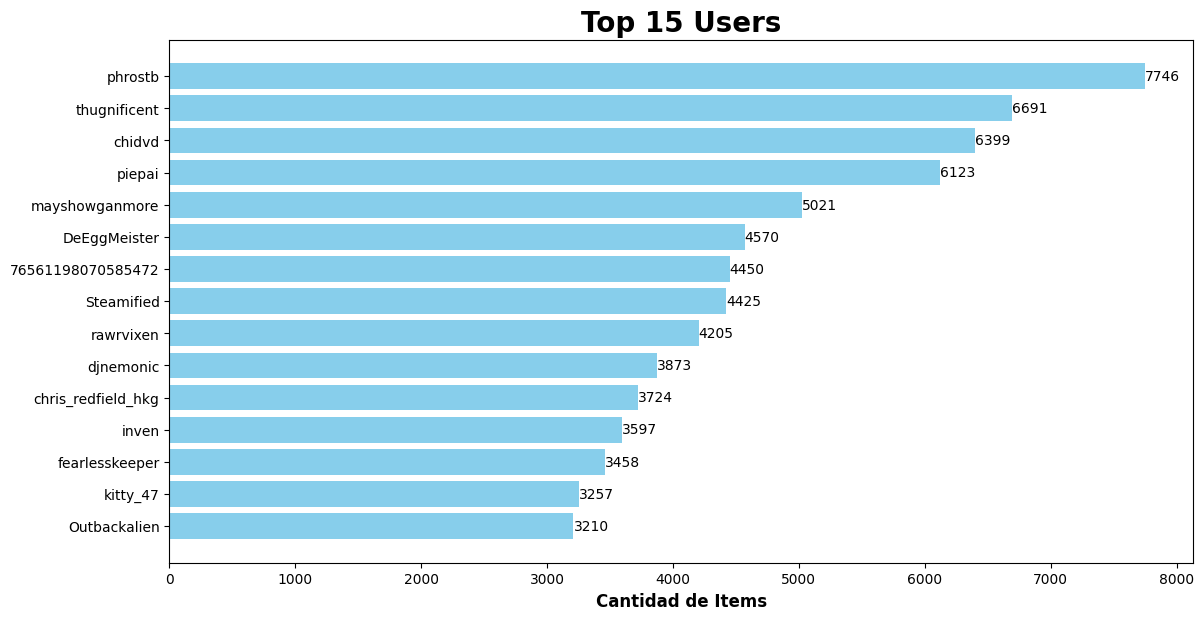

In [59]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(items['user_id'].value_counts().head(15).index,items['user_id'].value_counts().head(15).values,color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 15 Users', fontweight = 'bold',fontsize=20)
plt.xlabel('Cantidad de Items',fontweight = 'bold',fontsize=12)
for index, value in enumerate(items['user_id'].value_counts().head(15).values):
    plt.text(value, index, str(value), va='center')
plt.show()

#### Item_name

In [60]:
items['item_name'].value_counts()

item_name
Dota 2 Test                          49136
Counter-Strike: Global Offensive     43331
Garry's Mod                          42849
Unturned                             38278
Left 4 Dead 2                        36661
                                     ...  
Mimpi Dreams                             1
Cloudy with a Chance of Meatballs        1
DUCATI - 90th Anniversary                1
SNIPER BLACKLIST                         1
Kim                                      1
Name: count, Length: 10947, dtype: int64

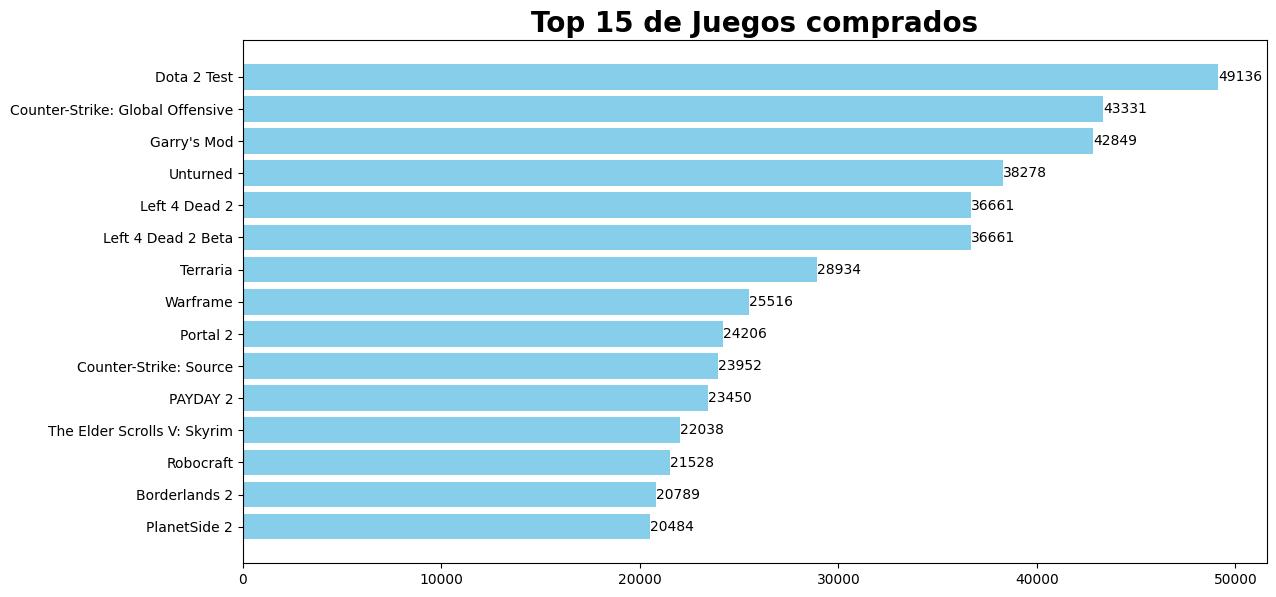

In [61]:
plt.subplots_adjust(left=0.2, right=1.8,top=1.2)
plt.barh(items['item_name'].value_counts().head(15).index,items['item_name'].value_counts().head(15).values,color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 15 de Juegos comprados', fontweight = 'bold',fontsize=20)
for index, value in enumerate(items['item_name'].value_counts().head(15).values):
    plt.text(value, index, str(value), va='center')
plt.show()

#### Playtime

In [62]:
pd.options.display.float_format = '{:,.2f}'.format
print(items['playtime'].describe())
pd.reset_option('display.float_format')

count   5,073,726.00
mean           16.57
std            90.41
min             0.00
25%             0.00
50%             0.57
75%             5.97
max        10,712.88
Name: playtime, dtype: float64


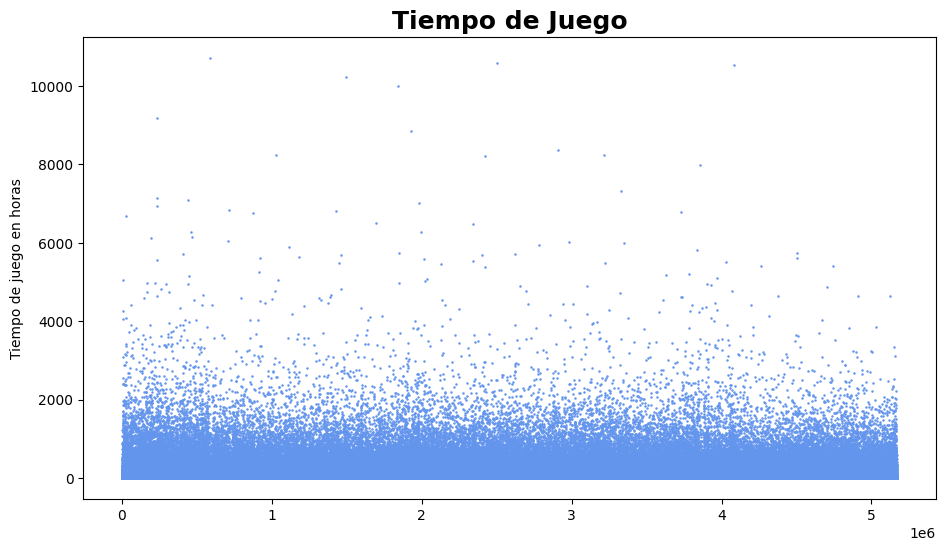

In [63]:
plt.figure(figsize=(11,6))
plt.plot(items['playtime'],'o',markersize=0.8,color='cornflowerblue')
plt.title('Tiempo de Juego', fontweight = 'bold',fontsize=18)
plt.ylabel('Tiempo de juego en horas')
plt.show()

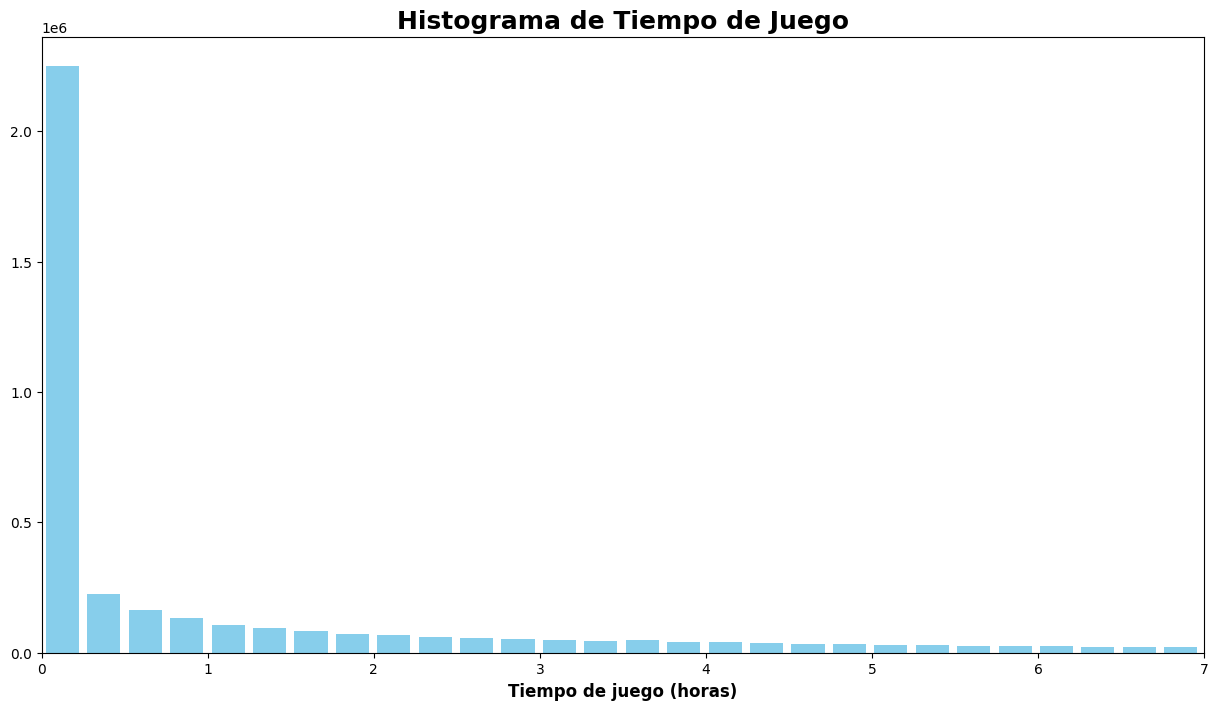

In [64]:
plt.figure(figsize=(15,8))
plt.hist(items[items['playtime']<7].iloc[:,3],bins=28,color='skyblue',rwidth=0.8)
plt.title('Histograma de Tiempo de Juego', fontweight = 'bold',fontsize=18)
plt.xticks(ticks=range(0,16))
plt.xlim(0,7)
plt.xlabel('Tiempo de juego (horas)',fontweight = 'bold',fontsize=12)
plt.show()

In [65]:
print('Cantidad de tiempos en 0:', items[items['playtime']==0].shape[0])
print('Porcentaje de tiempos en 0:',(items[items['playtime']==0].shape[0]/items.shape[0])*100,'%')

Cantidad de tiempos en 0: 1827921
Porcentaje de tiempos en 0: 36.02719185072272 %


In [66]:
pt_sin0 = items[~(items['playtime']==0)].iloc[:,3]

In [67]:
pd.options.display.float_format = '{:,.2f}'.format
print(pt_sin0.describe())
pd.reset_option('display.float_format')

count   3,245,805.00
mean           25.91
std           111.96
min             0.02
25%             0.73
50%             3.42
75%            13.47
max        10,712.88
Name: playtime, dtype: float64


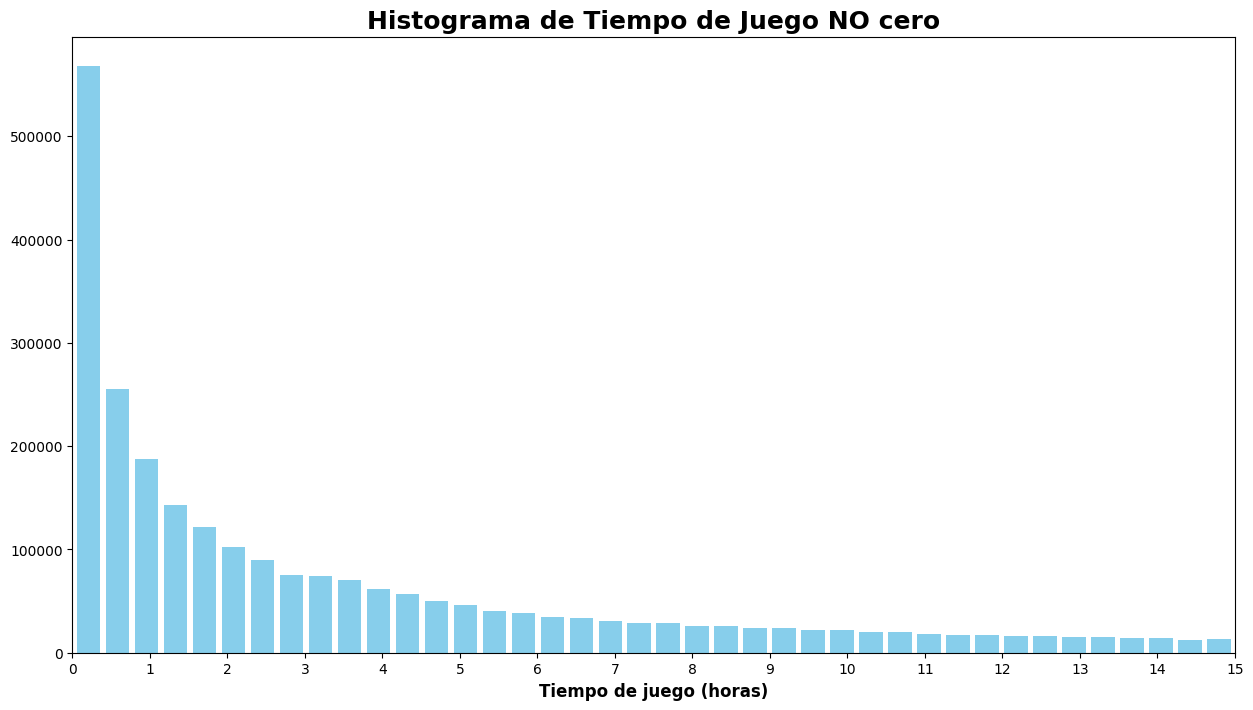

In [68]:
plt.figure(figsize=(15,8))
plt.hist(pt_sin0[pt_sin0<15],bins=40,color='skyblue',rwidth=0.8)
plt.title('Histograma de Tiempo de Juego NO cero', fontweight = 'bold',fontsize=18)
plt.xticks(ticks=range(0,16))
plt.xlim(0,15)
plt.xlabel('Tiempo de juego (horas)',fontweight = 'bold',fontsize=12)
plt.show()

##### Analisis de BoxPlot

In [69]:
#Calculo de bigotes
Q3 = float(items['playtime'].quantile(0.75))
Q1 = float(items['playtime'].quantile(0.25))
RIC = Q3 - Q1

min_pt = Q1 - 1.5*RIC
if min_pt < min(items['playtime']):
    min_pt = min(items['playtime'])
max_pt = Q3 + 1.5*RIC
if max_pt > max(items['playtime']):
    max_pt = max(items['playtime'])

min_pt, max_pt

(0.0, 14.916666666666666)

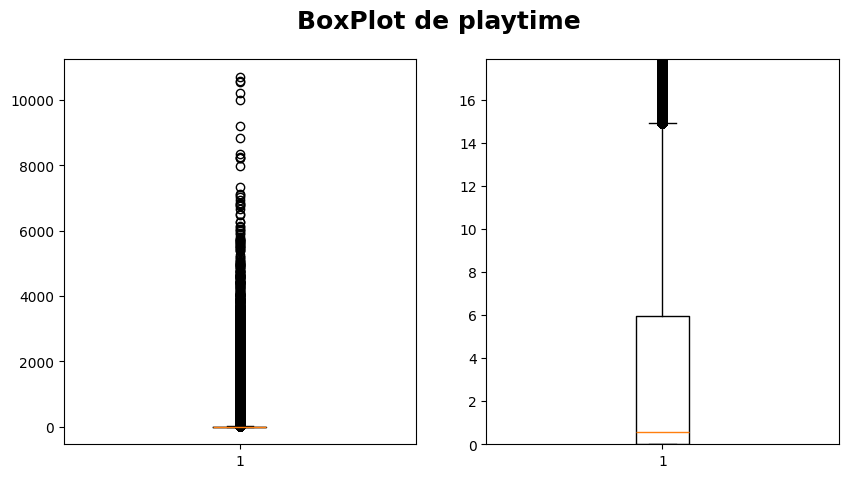

In [70]:
fig, ax = plt.subplots(1, 2,figsize = (10,5))
fig.suptitle('BoxPlot de playtime',fontsize=18, fontweight='bold')

ax[0].boxplot(items['playtime'].dropna())

ax[1].boxplot(items['playtime'].dropna())
ax[1].set_ylim(min_pt*0.8, max_pt*1.2)

plt.show()

In [71]:
print('Cantidad de outliers:', items[items['playtime']>=max_pt].shape[0])
print('Porcentaje de outliers:',(items[items['playtime']>=max_pt].shape[0]/items.shape[0])*100,'%')

Cantidad de outliers: 759652
Porcentaje de outliers: 14.972270871544897 %


In [72]:
#Calculo de bigotes
Q3 = float(pt_sin0.quantile(0.75))
Q1 = float(pt_sin0.quantile(0.25))
RIC = Q3 - Q1

min_pt_0 = Q1 - 1.5*RIC
if min_pt_0 < min(pt_sin0):
    min_pt_0 = min(pt_sin0)
max_pt_0 = Q3 + 1.5*RIC
if max_pt_0 > max(pt_sin0):
    max_pt_0 = max(pt_sin0)

min_pt_0, max_pt_0

(0.016666666666666666, 32.56666666666667)

In [73]:
print('Cantidad de outliers:', pt_sin0[pt_sin0>=max_pt_0].shape[0])
print('Porcentaje de outliers:',(pt_sin0[pt_sin0>=max_pt_0].shape[0]/items.shape[0])*100,'%')

Cantidad de outliers: 431525
Porcentaje de outliers: 8.505090736078378 %


Despues de revisar los resultados del analisis se dedicio no eliminar ninguno registro debido a que al ser un tiempo acumulado en el intervalo de 51 años (primer año de lanzamiento:1970 y ultimo año de lanzamiento: 2021) el valor maximo (10,712.88 horas) corresponderia a un promedio de 17.5 horas al mes. Teniendo en cuenta esto se considero que es posible la existencia de estos valores

#### Exporta nuevo archivo Items

In [74]:
pq.write_table(pa.Table.from_pandas(items),'items_eda.parquet')